In [ ]:
# Group Member:

# Nuntapong Jedsdariyajit   6322773100
# Theerachote Tanprawat     6322772094
# Peeranut Aimcharoen       6322772086
# Ayush Kwatra

# Import

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import time

from scipy.sparse import coo_matrix
from sklearn.metrics import mean_squared_error
from sklearn.decomposition import TruncatedSVD
from sklearn.metrics import mean_squared_error
from sklearn.model_selection import train_test_split
from sklearn.model_selection import KFold
from sklearn.metrics.pairwise import cosine_similarity
from numpy.linalg import norm

!pip install surprise
from surprise import Reader, Dataset, SVD
from surprise.model_selection import cross_validate
from surprise.model_selection import train_test_split
from surprise import accuracy

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 772.0/772.0 kB 10.4 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
  Created wheel for scikit-surprise: filename=scikit_surprise-1.1.3-cp310-cp310-linux_x86_64.whl size=3095453 sha256=2c689f9f5bb807d4051a1ca450469de1f138dafcfe121fedb5c9729794320cfc
  Stored in directory: /root/.cache/pip/wheels/a5/ca/a8/4e28def53797fdc4363ca4af740db15a9c2f1595ebc51fb445
Successfully built scikit-surprise


In [ ]:
df_mov = pd.read_csv("https://raw.githubusercontent.com/SIIT3100/BD_Project2/main/movies.csv")
rt_train = pd.read_csv("https://raw.githubusercontent.com/SIIT3100/BD_Project2/main/ratings_train.csv")
rt_valid = pd.read_csv("https://raw.githubusercontent.com/SIIT3100/BD_Project2/main/ratings_valid.csv")
df_tags = pd.read_csv("https://raw.githubusercontent.com/SIIT3100/BD_Project2/main/tags.csv")

# For Modification

In [ ]:
# Replace training df with new training df
# Training dataset should have training userId, movieId, rating columns

def changeTraining(df):
    rt_train = df
    return rt_train

# DELETE # BELOW TO USE
# changeTraining(newDf)

In [ ]:
# Replace validation df with new validation df
# Validation dataset should have validation userId, movieId, rating columns


def changeValidation(df):
    rt_valid = df
    return rt_valid


# DELETE # BELOW TO USE
# changeValidation(newDf)

In [ ]:
# Predict rating (match predicted scores wtih given userId/movieId)
# IMPORTANT: Please run the rest of the codes below first
# *Note: Choose which predicted result to use from (SVD, SGD, Weighted), default is weighted prediction

def PredictRt(newDf, predicted):
    # table = predicted data frame (SVD, SGD, Weighted)
    # newDf = dataframe with no ratings (New df)

    # Input:
    # newDf = a dataframe with two columns: userId, movieId
    # Output:
    # a dataframe with three columns: userId, movieId, predicted ratings

    predictedDF = predicted[['userId', 'movieId','rating']]
    return pd.merge(newDF, predictedDf,  how='inner', left_on=['userId','movieId'], right_on = ['userId','movieId'])


# DELETE # BELOW TO USE
# changeValidation(newDf, ratings_predWeightedF[['userId', 'movieId','Rating Valid','Weighted Predicted Rating']])

# Data Preparation

In [ ]:
# Define validation dataset (drop timestamp as it is not needed)
r = rt_valid.drop(['timestamp'], axis=1)
r

,userId,movieId,rating
0,4,45,3.0
1,4,52,3.0
2,4,58,3.0
3,4,222,1.0
4,4,247,3.0
...,...,...,...
2349,561,139385,3.5
2350,561,146656,3.5
2351,561,149406,3.5
2352,561,160438,2.0


In [ ]:
# Data selection
# Selecting only userID as row and movieID as column in a pivot table

rtt_matrix = pd.pivot_table(rt_train, values='rating', index='userId', columns='movieId', fill_value=0)
rtt_matrix

movieId,1,2,3,4,5,6,7,8,9,10,...,193565,193567,193571,193573,193579,193581,193583,193585,193587,193609
userId,,,,,,,,,,,,,,,,,,,,,
1,4.0,0.0,4.0,0.0,0.0,4.0,0.0,0,0.0,0.0,...,0.0,0,0,0,0.0,0,0.0,0.0,0.0,0
2,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0,0.0,0.0,...,0.0,0,0,0,0.0,0,0.0,0.0,0.0,0
3,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0,0.0,0.0,...,0.0,0,0,0,0.0,0,0.0,0.0,0.0,0
4,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0,0.0,0.0,...,0.0,0,0,0,0.0,0,0.0,0.0,0.0,0
5,4.0,0.0,0.0,0.0,0.0,0.0,0.0,0,0.0,0.0,...,0.0,0,0,0,0.0,0,0.0,0.0,0.0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
606,2.5,0.0,0.0,0.0,0.0,0.0,2.5,0,0.0,0.0,...,0.0,0,0,0,0.0,0,0.0,0.0,0.0,0
607,4.0,0.0,0.0,0.0,0.0,0.0,0.0,0,0.0,0.0,...,0.0,0,0,0,0.0,0,0.0,0.0,0.0,0
608,2.5,2.0,2.0,0.0,0.0,0.0,0.0,0,0.0,4.0,...,0.0,0,0,0,0.0,0,0.0,0.0,0.0,0


In [ ]:
# Matrix transformation,
# transform previous matrix into array to make coordinate matrix object

rttArr = rtt_matrix.values
R = coo_matrix(rttArr)

print ("R Shape::", R.shape)
print ("R Columns::", R.col)
print ("R Rows::",R.row)
print(R)

R Shape:: (610, 9690)
R Columns:: [   0    2    5 ... 9423 9424 9463]
R Rows:: [  0   0   0 ... 609 609 609]
  (0, 0)	4.0
  (0, 2)	4.0
  (0, 5)	4.0
  (0, 43)	5.0
  (0, 46)	5.0
  (0, 62)	3.0
  (0, 89)	5.0
  (0, 97)	4.0
  (0, 124)	5.0
  (0, 130)	5.0
  (0, 136)	5.0
  (0, 184)	5.0
  (0, 190)	3.0
  (0, 197)	5.0
  (0, 201)	4.0
  (0, 224)	5.0
  (0, 257)	3.0
  (0, 275)	3.0
  (0, 291)	5.0
  (0, 307)	4.0
  (0, 314)	4.0
  (0, 320)	5.0
  (0, 325)	4.0
  (0, 367)	3.0
  (0, 384)	4.0
  :	:
  (609, 9224)	5.0
  (609, 9231)	4.5
  (609, 9241)	4.0
  (609, 9253)	5.0
  (609, 9259)	3.5
  (609, 9264)	3.5
  (609, 9267)	3.0
  (609, 9273)	3.0
  (609, 9287)	3.0
  (609, 9290)	2.5
  (609, 9295)	4.5
  (609, 9300)	3.0
  (609, 9307)	3.0
  (609, 9321)	4.0
  (609, 9323)	4.0
  (609, 9330)	3.5
  (609, 9353)	3.5
  (609, 9354)	3.5
  (609, 9356)	5.0
  (609, 9395)	4.0
  (609, 9396)	4.0
  (609, 9422)	5.0
  (609, 9423)	5.0
  (609, 9424)	5.0
  (609, 9463)	3.0


# SGD Model

In [ ]:
# Define error function, calculates error of predicted rating by matrix factorization model (less value = better)

def error(R,P,Q,lamda):
    ratings = R.data
    rows = R.row
    cols = R.col
    e = 0
    for ui in range(len(ratings)):
        rui=ratings[ui]
        u = rows[ui]
        i = cols[ui]
        if rui>0:
            e= e + pow(rui-np.dot(P[u,:],Q[:,i]),2)+\
                lamda*(pow(norm(P[u,:]),2)+pow(norm(Q[:,i]),2))
    return e

# error(R,P,Q)

In [ ]:
# define SGD function, take input of input matrix (R), number of latent factors (K),
# regularization parameter (lamda), number of iterations (steps), learning rate (gamma),
# regulaziation type and strength (reg_)

def SGD(R, K, lamda, steps, gamma, reg_type, reg_strength):

    M, N = R.shape
    P = np.random.rand(M, K)
    Q = np.random.rand(K, N)

    rmse = np.sqrt(error(R, P, Q, lamda)/len(R.data))
    print("Initial RMSE: "+str(rmse))

    # prev_rmse_str = str(rmse)[:5]
    # consecutive_count = 0

    for step in range(steps):
        # print(step)
        # print(str(rmse))
        for ui in range(len(R.data)):
            rui = R.data[ui]
            u = R.row[ui]
            i = R.col[ui]
            if rui > 0:
                eui = 2*(rui - np.dot(P[u, :], Q[:, i]))
                # Define calculation for each of regularization type
                if reg_type == 'l2':
                    reg_term_p = reg_strength * P[u, :]
                    reg_term_q = reg_strength * Q[:, i]
                elif reg_type == 'l1':
                    reg_term_p = reg_strength * np.sign(P[u, :])
                    reg_term_q = reg_strength * np.sign(Q[:, i])
                elif reg_type == 'elastic_net':
                    reg_term_p = reg_strength * ((1 - 0.5) * P[u, :] + 0.5 * np.sign(P[u, :]))
                    reg_term_q = reg_strength * ((1 - 0.5) * Q[:, i] + 0.5 * np.sign(Q[:, i]))
                else:
                    raise ValueError('Invalid regularization type.')

                P[u, :] = P[u, :] + gamma * (eui * Q[:, i] - reg_term_p)
                Q[:, i] = Q[:, i] + gamma * (eui * P[u, :] - reg_term_q)

        rmse = np.sqrt(error(R, P, Q, lamda)/len(R.data))
        rmse_str = str(rmse)[:4]

        # if rmse_str == prev_rmse_str:
        #     consecutive_count += 1
        # else:
        #     consecutive_count = 0

        if rmse < 0.5: # break if RMSE < 0.5
            break
        #
        # elif rmse < 0.4:
        #    if consecutive_count == 6:
        #        print("Consecutive RMSE values repeated 5 times (Break loop)")
        #        break

        # prev_rmse_str = rmse_str

    print("Final RMSE: "+str(rmse))
    return P, Q # P_OG, Q_OG

In [ ]:
def predict_rating(df, table): # Prepare data for finding validation RMSE
    # ONLY USED IN random_search_SGD DEFINED BELOW
    train = table[['index', 'MovieId','Rating']]
    return pd.merge(train, df,  how='inner', left_on=['index','MovieId'], right_on = ['userId','movieId'])

In [ ]:
# Loop to find best hyperparameters for SGD functions by taking multiple parameters and running them in different combination

def random_search_SGD(R, range_K, range_lambda, range_steps, range_gamma, reg_types, range_reg_strength, rt_validA, rtt_matrixA):
    best_RMSE = 1000 # set initial RMSE, can be anything
    best_params = {}
    for steps in range_steps: # loop for all parameters range/list
        for reg_type in reg_types:
            for K in range_K:
                for lamda in range_lambda:
                    for gamma in range_gamma:
                        for reg_strength in range_reg_strength:
                            start_time = time.time()
                            params = {"K": K, "lamda": lamda, "steps": steps, "gamma": gamma, "reg_type": reg_type, "reg_strength": reg_strength}
                            print(str(K)+" "+str(lamda)+" "+str(steps)+" "+str(gamma)+" "+str(reg_type)+" "+str(reg_strength))
                            P, Q = SGD(R, **params) # Run SGD with R matrix and other input parameters, receive P,Q
                            rmse = np.sqrt(error(R, P, Q, lamda)/len(R.data)) # receive RMSE value of that combination using P,Q

                            tableA = matrixTrf(P,Q, rtt_matrixA) # transform matrix with current P,Q
                            r = rt_validA[['userId', 'movieId','rating']] # get validation dataset
                            ratings_pred = predict_rating(r, tableA) # input two dataframe, output concatenated dataframe

                            r_true = ratings_pred['rating'].to_numpy()
                            r_pred = ratings_pred['Rating'].to_numpy()

                            rmseFN = mean_squared_error(r_true, r_pred, squared=False) # compare ratings from two dataframes to find validation RMSE

                            # print(rmse1(r_pred,r_true))
                            print(f"Validation RMSE = {rmseFN:.4f}")
                            end_time = time.time()
                            elapsed_time = (end_time - start_time) / 60
                            print("Elapsed time: {:.2f} minutes".format(elapsed_time))
                            print("\n")

                            if rmseFN < best_RMSE:
                                best_RMSE = rmseFN
                                best_params = params

    return best_params

range_K = [20]
range_lambda =  [0.0001, 0.00025, 0.001, 0.01, 0.1] # range_lambda =  [0.001, 0.005, 0.01, 0.05, 0.075, 0.1]
range_steps = [150] # range_steps = range(50, 151, 30)
range_gamma = range_gamma = [0.00215, 0.005, 0.01] # [0.001, 0.00215, 0.005, 0.01, 0.05, 0.075, 0.1]
# P,Q=SGD(R,K=2,lamda=0.00022,steps=250, gamma=0.00215, reg_type='elastic_net', reg_strength=0.01)
reg_types = ['l2', 'elsati_net'] # ['l1', 'l2', 'elastic_net']
range_reg_strength = [0.015]

# best_params = random_search_SGD(R, range_K, range_lambda, range_steps, range_gamma, reg_types, range_reg_strength, rt_valid, rtt_matrix)
# best_params = random_search_SGD(R, [2], [0.0001], [150], [0.00215], ['elastic_net'], 0.031)
# print(best_params)

In [ ]:
# matrix transformation, accept matrix and transform it back into a dataframe
def matrixTrf(P,Q, rtt_matrix):

    all_user_ratings = np.matmul(P, Q) # Create predicted ratings from P Q

    # Create new matrix "table" with data from SGD, and columns/rows header from original data
    user_list=list(rtt_matrix.index)
    movie_list=list(rtt_matrix.columns)

    all_user_ratings_df = pd.DataFrame(np.round(all_user_ratings,4),columns=movie_list, index=user_list)
    all_user_ratings_df.shape
    table = pd.melt(all_user_ratings_df.reset_index(), id_vars='index', var_name="MovieId", value_name="Rating")

    return table

In [ ]:
def predict_ratingSGD(df, table): # Prepare data for finding validation RMSE (for SGD method)
    train = table[['index', 'MovieId','Rating']] # Create new df from 'table' SGD-predicted df
    return pd.merge(train, df,  how='inner', left_on=['index','MovieId'], right_on = ['userId','movieId'])

# SGD RMSE

In [ ]:
# Accept hyperparameter to run in SGD algorithm
P,Q = SGD(R, K=2,lamda=0.00575,steps=200, gamma=0.00215, reg_type='l2', reg_strength=0.0425)

Initial RMSE: 3.2098002940880566
Final RMSE: 0.7743483839589452


In [ ]:
# use matrixTrf function to transform P,Q back into a dataframe

# Final SGD predicted df
tableSGD = matrixTrf(P,Q, rtt_matrix)
tableSGD

,index,MovieId,Rating
0,1,1,4.7488
1,2,1,3.8746
2,3,1,2.4041
3,4,1,3.2927
4,5,1,3.6806
...,...,...,...
5910895,606,193609,3.7836
5910896,607,193609,3.7455
5910897,608,193609,3.9926
5910898,609,193609,3.4091


In [ ]:
ratings_predSGD = predict_ratingSGD(r, tableSGD) # input validation and predicted values to numpy to calculate RMSE

r_true = ratings_predSGD['rating'].to_numpy() # validation rating
r_pred = ratings_predSGD['Rating'].to_numpy() # SGD-predicted rating

rmseSGD = mean_squared_error(r_true, r_pred, squared=False)

print(f"Validation SGD RMSE = {rmseSGD:.4f}")

Validation SGD RMSE = 0.8638


In [ ]:
# Final predicted rating DF side-by-side with validation data set
ratings_predSGD = ratings_predSGD[['userId', 'movieId', 'rating', 'Rating']]
ratings_predSGD = ratings_predSGD.rename(columns={'rating': 'Validation SGD Rating'})
ratings_predSGD = ratings_predSGD.rename(columns={'Rating': 'Predicted SGD Rating'})
ratings_predSGD

,userId,movieId,Validation SGD Rating,Predicted SGD Rating
0,274,8,3.0,2.6187
1,217,12,3.0,1.8802
2,274,12,3.5,2.0477
3,350,12,3.0,2.0908
4,380,12,4.0,2.2687
...,...,...,...,...
2349,153,179819,0.5,1.2610
2350,249,179819,4.5,3.9493
2351,380,179819,0.5,3.6593
2352,249,187593,5.0,4.2848


# SVD Model

In [ ]:
def predict_ratingSVD(df, table): # Prepare data for finding validation RMSE (for SVD method) # We use different function because variable names are not consistent
    train = table[['userId', 'movieId','rating']]
    return pd.merge(train, df,  how='inner', left_on=['userId','movieId'], right_on = ['userId','movieId'])

In [ ]:
# SVD model
reader = Reader(rating_scale=(0.5, 5.0)) # define that rating can range from 0.5 to 5.0

# create/prepare new surprise dataset objects
data = Dataset.load_from_df(rt_train[['userId', 'movieId', 'rating']], reader)
trainset, testset = train_test_split(data, test_size=.25) # Split the data into training and test sets

algo = SVD() # define training algorithm (SVD)
algo.fit(trainset) # train dataset

user_ids = rt_train['userId'].unique() # get list of unique id for users and movies
movie_ids = rt_train['movieId'].unique()

# create and predict all possible values for each user and movie
user_item_pairs = np.array([(user, item) for user in user_ids for item in movie_ids])
user_item_predictions = []
for user, item in user_item_pairs:
    user_item_predictions.append(algo.predict(user, item))

# Convert predictions to pandas dataframe
SVDpred_df = pd.DataFrame(user_item_predictions, columns=['userId', 'movieId', 'r_ui', 'rating', 'details'])
SVDpred_df = SVDpred_df[['userId', 'movieId', 'rating']]


# Final SVD predicted df
SVDpred_df

,userId,movieId,rating
0,1,1,4.624511
1,1,3,3.959321
2,1,6,4.510287
3,1,47,4.601231
4,1,50,4.845526
...,...,...,...
5910895,610,160341,3.333003
5910896,610,160527,3.919266
5910897,610,160836,3.317243
5910898,610,163937,3.547400


# SVD RMSE

In [ ]:
# tableSVD = tableSVD.rename(columns={'userId': 'userId'})
ratings_predSVD  = predict_ratingSVD(r, SVDpred_df)

r_trueSVD = ratings_predSVD['rating_x'].to_numpy() # input validation and predicted values to numpy to calculate RMSE
r_predSVD = ratings_predSVD['rating_y'].to_numpy()

rmseFN = mean_squared_error(r_trueSVD, r_predSVD, squared=False)

print(f"Validation SVD RMSE = {rmseFN:.4f}")

Validation SVD RMSE = 0.8665


In [ ]:
# Final predicted rating DF side-by-side with validation data set
ratings_predSVD = ratings_predSVD[['userId', 'movieId', 'rating_y', 'rating_x']]
ratings_predSVD = ratings_predSVD.rename(columns={'rating_x': 'Predicted SVD Rating'})
ratings_predSVD = ratings_predSVD.rename(columns={'rating_y': 'Validation SVD Rating'})
ratings_predSVD

,userId,movieId,Validation SVD Rating,Predicted SVD Rating
0,4,441,1.0,3.941742
1,4,1967,5.0,3.493049
2,4,58,3.0,3.640610
3,4,247,3.0,3.815999
4,4,265,5.0,3.486313
...,...,...,...,...
2349,561,4121,3.0,2.991688
2350,561,2815,3.0,3.139507
2351,561,2373,2.5,3.171191
2352,561,120799,1.0,3.071111


# Weighted Prediction (SVD+SGD)

In [ ]:
ratings_predWeighted = ratings_predSVD # Clone rating table from SVD table
ratings_predWeighted

,userId,movieId,Validation SVD Rating,Predicted SVD Rating
0,4,441,1.0,3.941742
1,4,1967,5.0,3.493049
2,4,58,3.0,3.640610
3,4,247,3.0,3.815999
4,4,265,5.0,3.486313
...,...,...,...,...
2349,561,4121,3.0,2.991688
2350,561,2815,3.0,3.139507
2351,561,2373,2.5,3.171191
2352,561,120799,1.0,3.071111


In [ ]:
# join SVD and SGD rating tables
ratings_predWeightedN = pd.merge(ratings_predWeighted, ratings_predSGD, how='inner', left_on=['userId', 'movieId'], right_on=['userId', 'movieId'])
ratings_predWeightedN

,userId,movieId,Validation SVD Rating,Predicted SVD Rating,Validation SGD Rating,Predicted SGD Rating
0,4,441,1.0,3.941742,1.0,3.7727
1,4,1967,5.0,3.493049,5.0,4.0828
2,4,58,3.0,3.640610,3.0,3.5360
3,4,247,3.0,3.815999,3.0,4.0143
4,4,265,5.0,3.486313,5.0,3.6876
...,...,...,...,...,...,...
2349,561,4121,3.0,2.991688,3.0,2.6822
2350,561,2815,3.0,3.139507,3.0,1.8353
2351,561,2373,2.5,3.171191,2.5,2.1545
2352,561,120799,1.0,3.071111,1.0,2.2704


In [ ]:
# preparation for weight calculation
ratings_predWeightedN = ratings_predWeightedN.drop(['Validation SGD Rating'], axis=1) # Drop one validation rating
ratings_predWeightedN = ratings_predWeightedN.rename(columns={'Validation SVD Rating': 'Rating Valid'})
# Rename SVD validation rating to validation rating / remove duplicate


# All rating tables
ratings_predWeightedN

,userId,movieId,Rating Valid,Predicted SVD Rating,Predicted SGD Rating
0,4,441,1.0,3.941742,3.7727
1,4,1967,5.0,3.493049,4.0828
2,4,58,3.0,3.640610,3.5360
3,4,247,3.0,3.815999,4.0143
4,4,265,5.0,3.486313,3.6876
...,...,...,...,...,...
2349,561,4121,3.0,2.991688,2.6822
2350,561,2815,3.0,3.139507,1.8353
2351,561,2373,2.5,3.171191,2.1545
2352,561,120799,1.0,3.071111,2.2704


In [ ]:
ratings_predWeightedXT = ratings_predWeightedN # Clone all rating tables

def rmseTempX(): # loop to find best weight for each predicted rating
    rmseTemp = 1000
    xz = 0
    status = True
    while(status):
        xz += 0.001
        xz = round(xz, 3)
        yz = 1.000 - xz
        ratings_predWeightedXT['Weighted Predicted Rating'] = (ratings_predWeightedXT['Predicted SGD Rating']*xz) + (ratings_predWeightedXT['Predicted SVD Rating']*yz)
        r_trueXT = ratings_predWeightedXT['Weighted Predicted Rating'].to_numpy()
        r_predXT = ratings_predWeightedXT['Rating Valid'].to_numpy()
        rmseTemp_test = mean_squared_error(r_trueXT, r_predXT, squared=False)
        if (rmseTemp_test) < rmseTemp:
          rmseTemp = rmseTemp_test
          xz_final = xz
          yz_final = yz
        if (xz) >= 1.000:
          status = False
    print("Weight 1 = ",xz_final)
    print("Weight 2 = ",yz_final)
    print(f"Validation Weighted Model RMSE = {rmseTemp:.4f}")
    return xz_final, yz_final

w1,w2 = rmseTempX()
ratings_predWeightedXT['Weighted Predicted Rating'] = (ratings_predWeightedXT['Predicted SGD Rating']*w1) + (ratings_predWeightedXT['Predicted SVD Rating']*w2)


Weight 1 =  0.513
Weight 2 =  0.487
Validation Weighted Model RMSE = 0.8381


In [ ]:
ratings_predWeightedXT[['userId', 'movieId','Rating Valid','Weighted Predicted Rating']]

,userId,movieId,Rating Valid,Weighted Predicted Rating
0,4,441,1.0,3.855023
1,4,1967,5.0,3.795591
2,4,58,3.0,3.586945
3,4,247,3.0,3.917728
4,4,265,5.0,3.589573
...,...,...,...,...
2349,561,4121,3.0,2.832921
2350,561,2815,3.0,2.470449
2351,561,2373,2.5,2.649628
2352,561,120799,1.0,2.660346


# Others

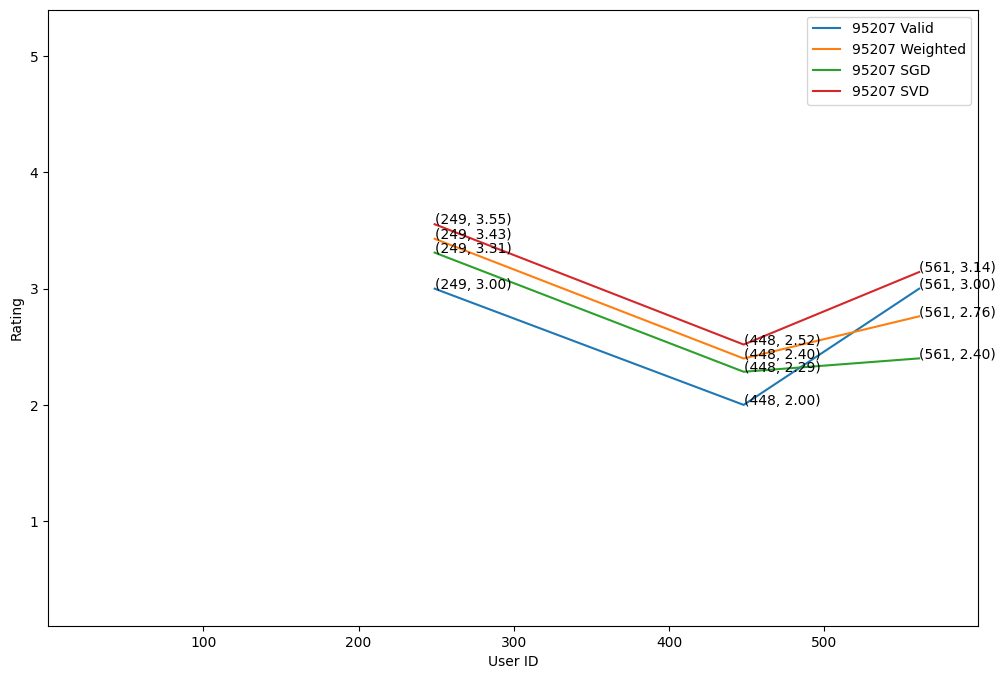

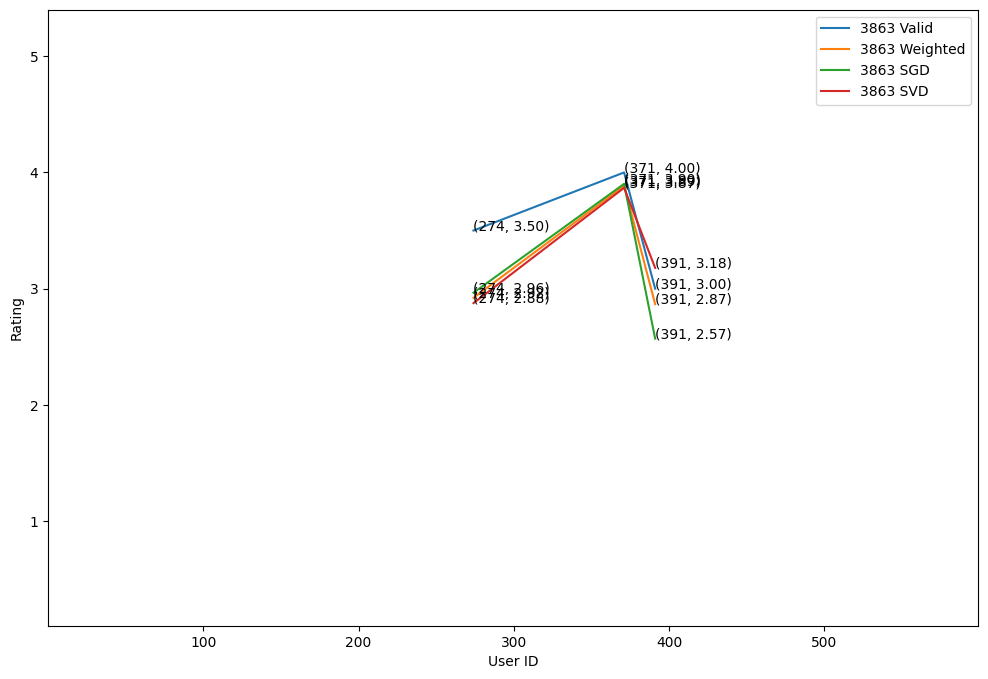

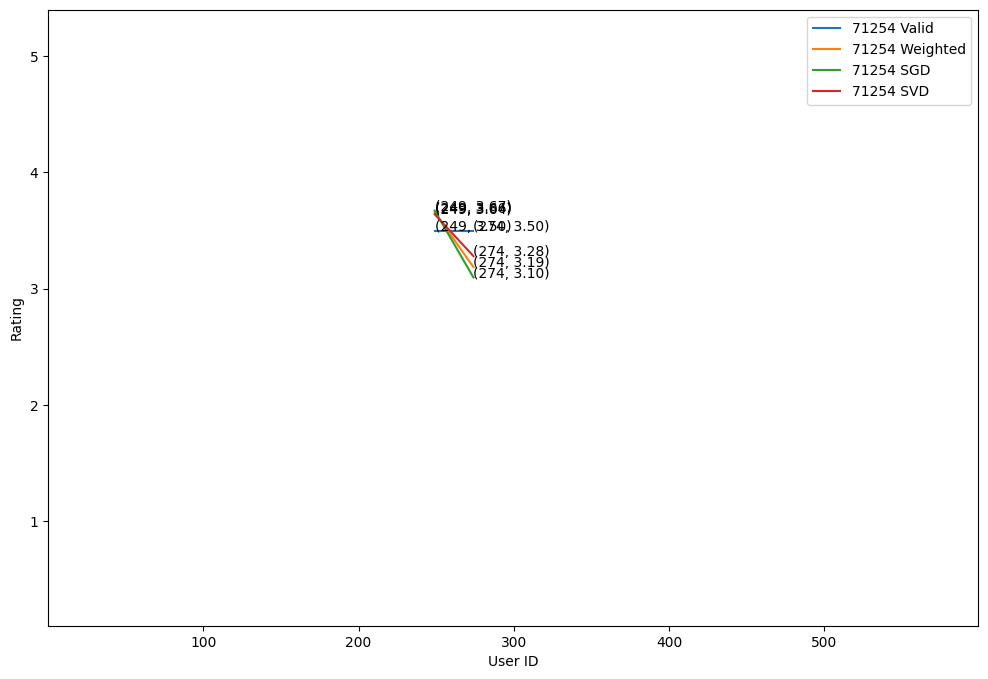

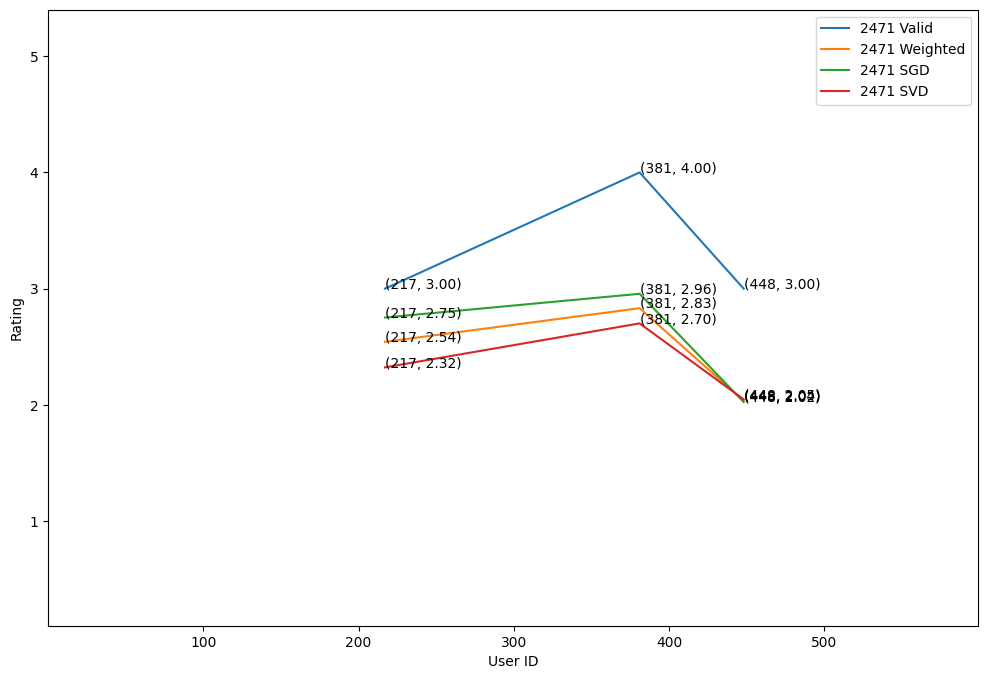

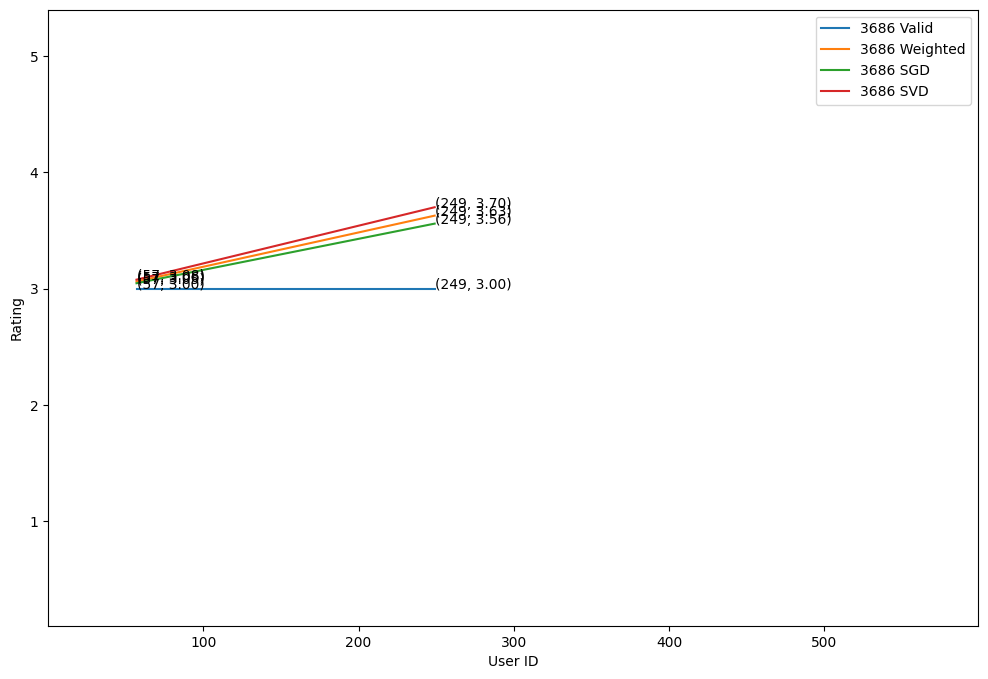

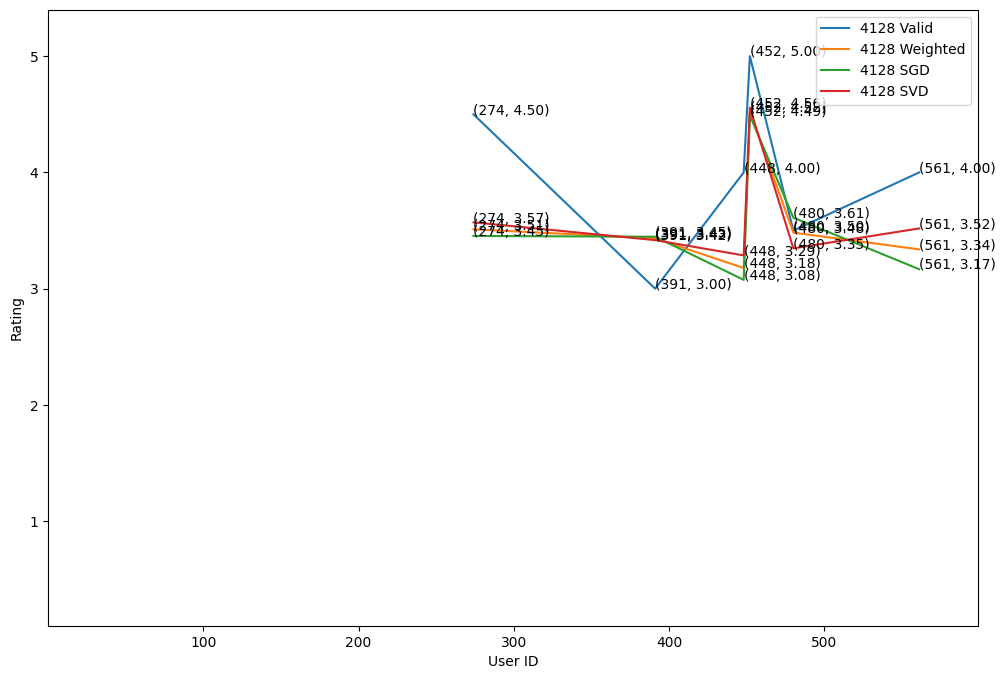

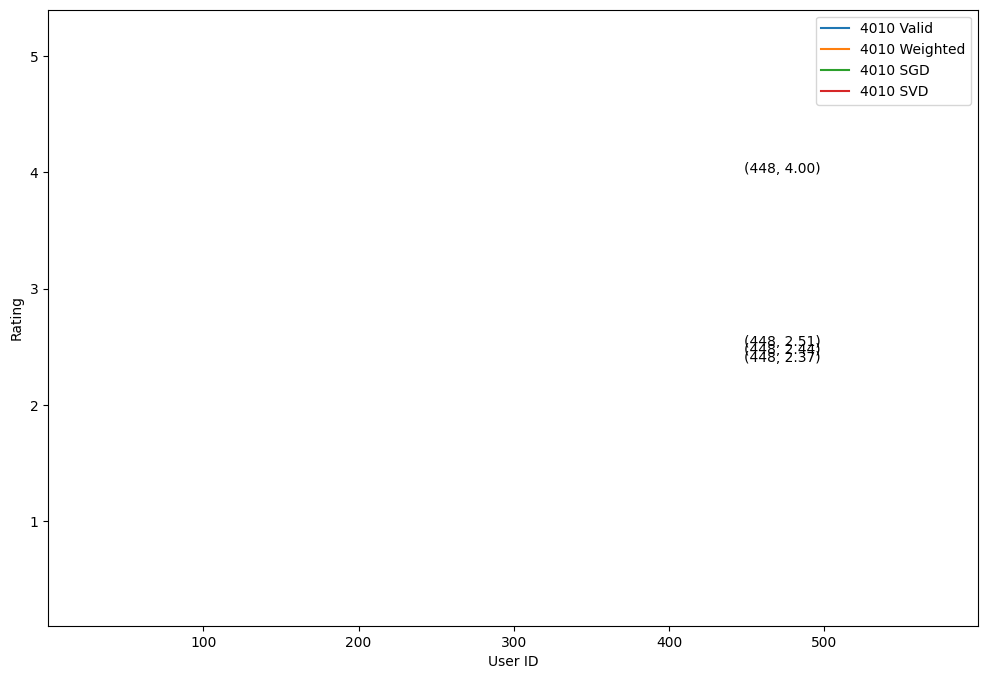

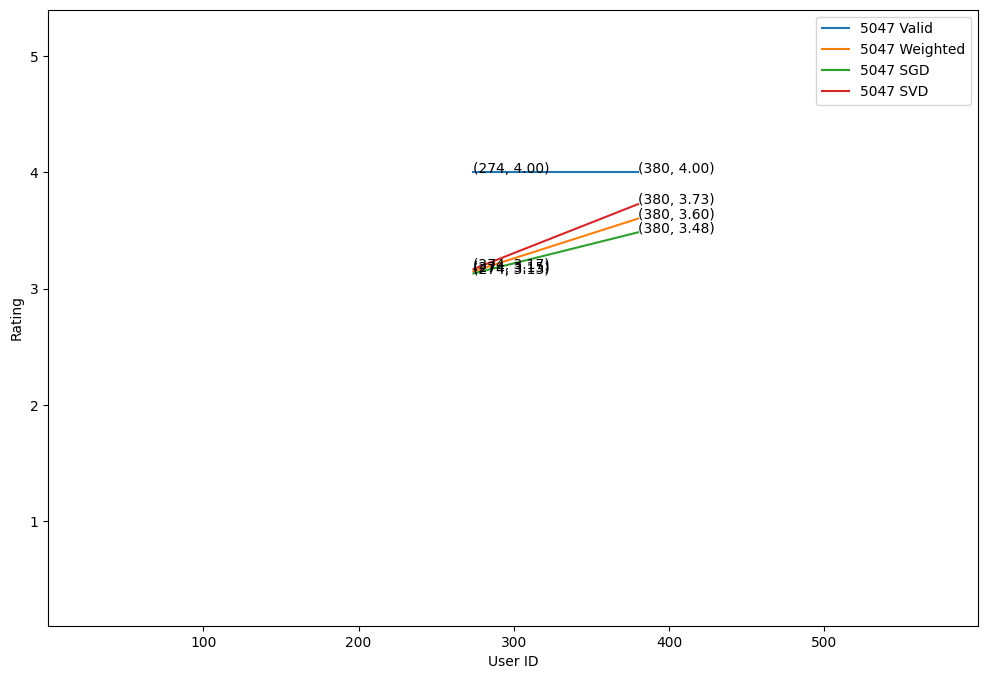

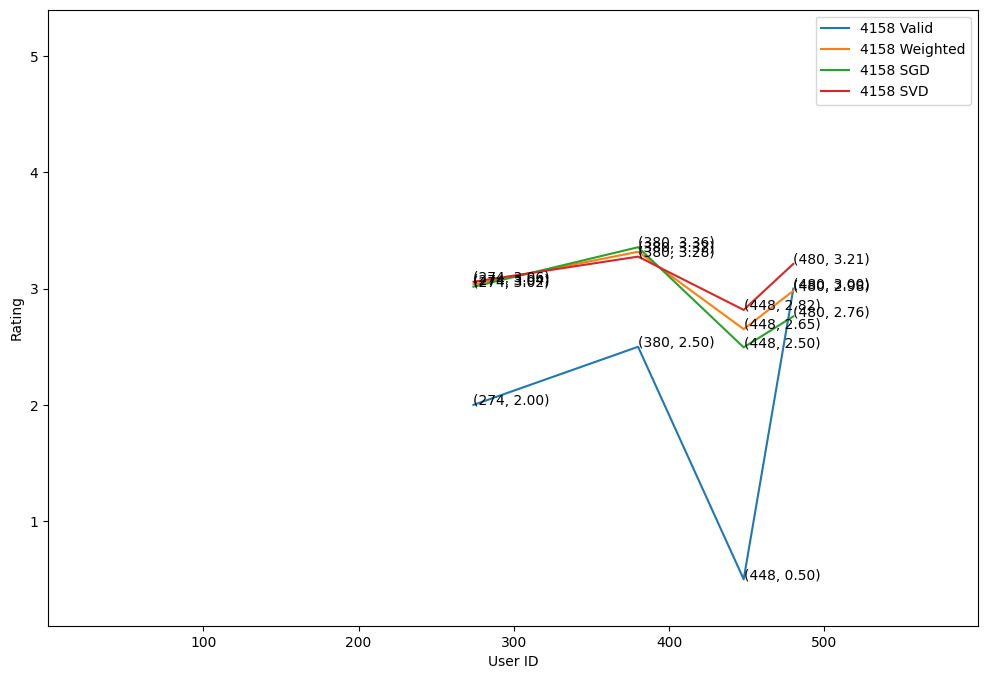

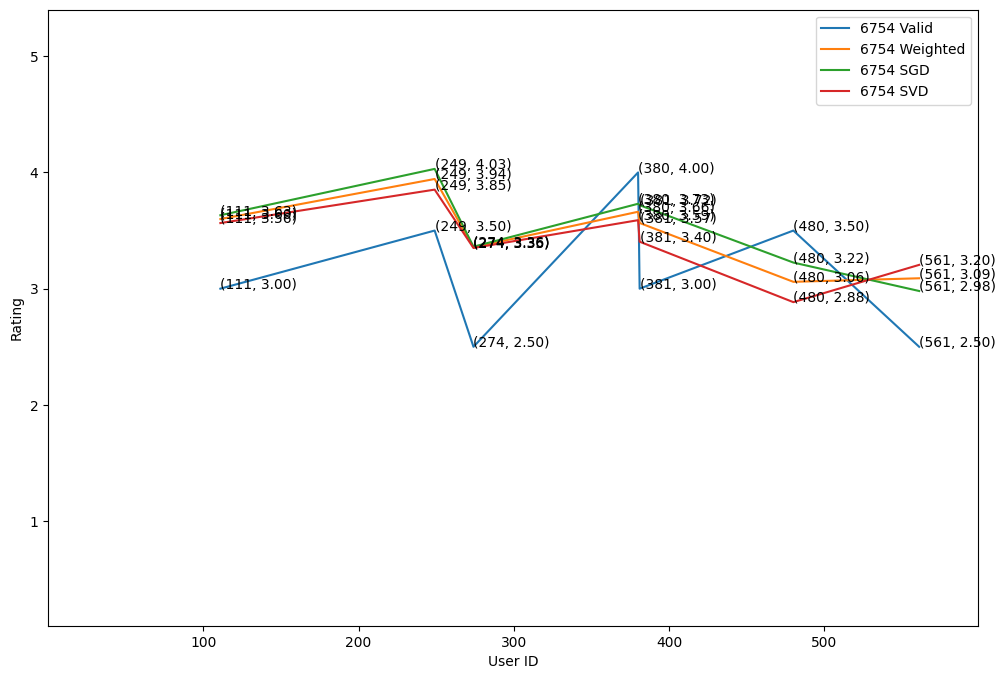

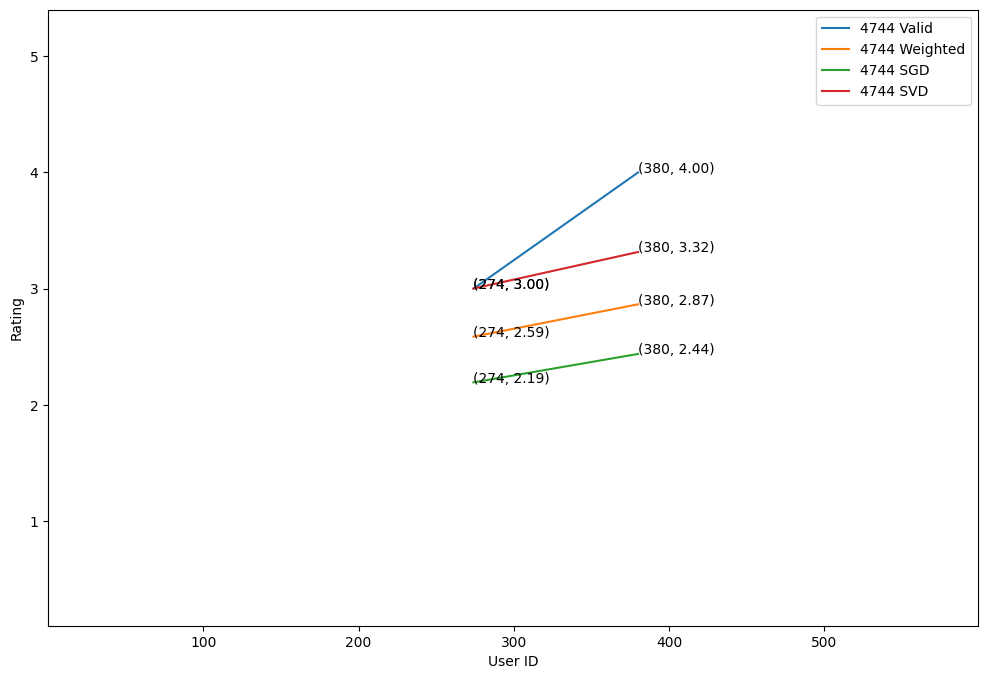

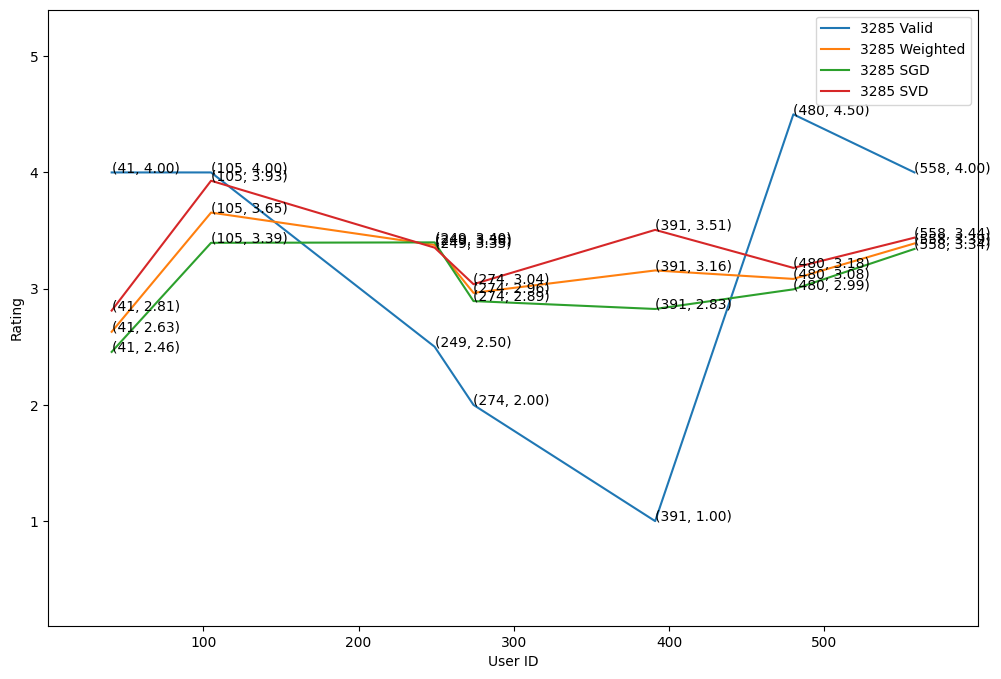

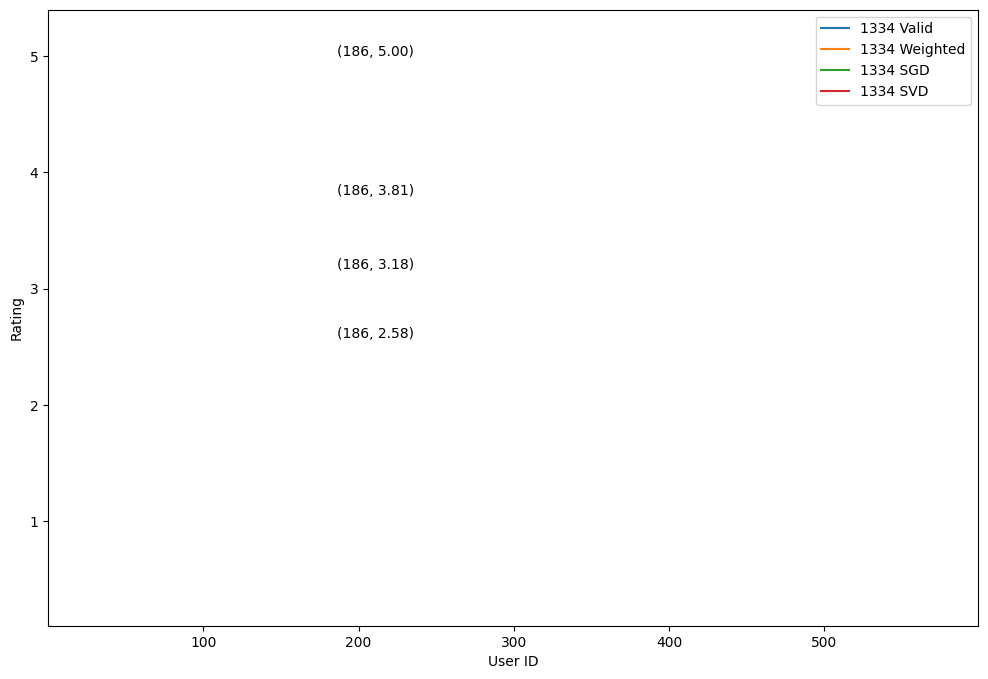

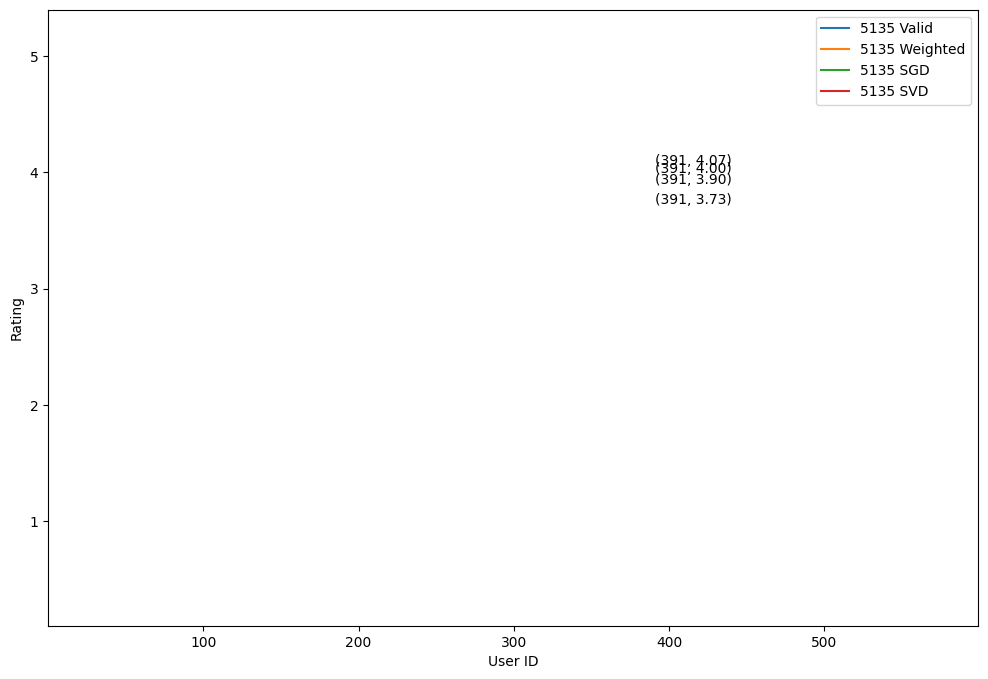

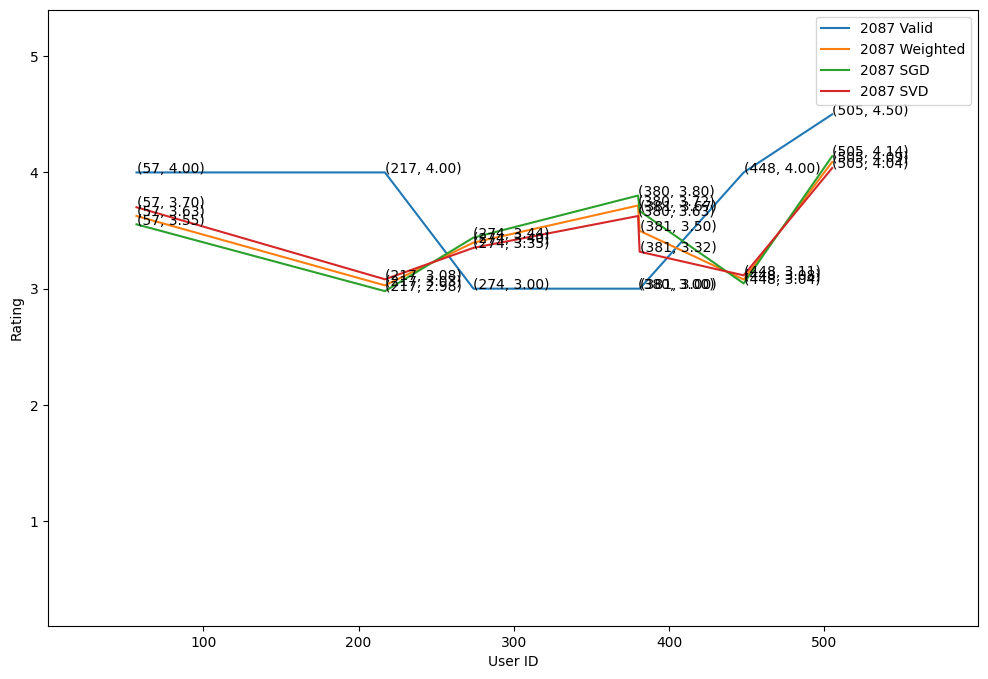

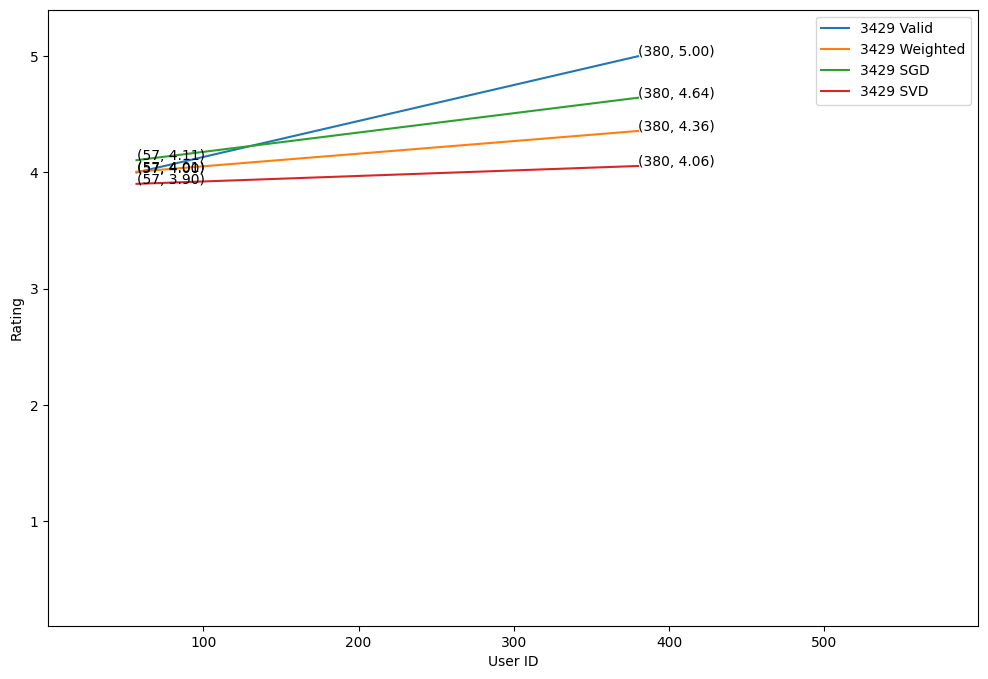

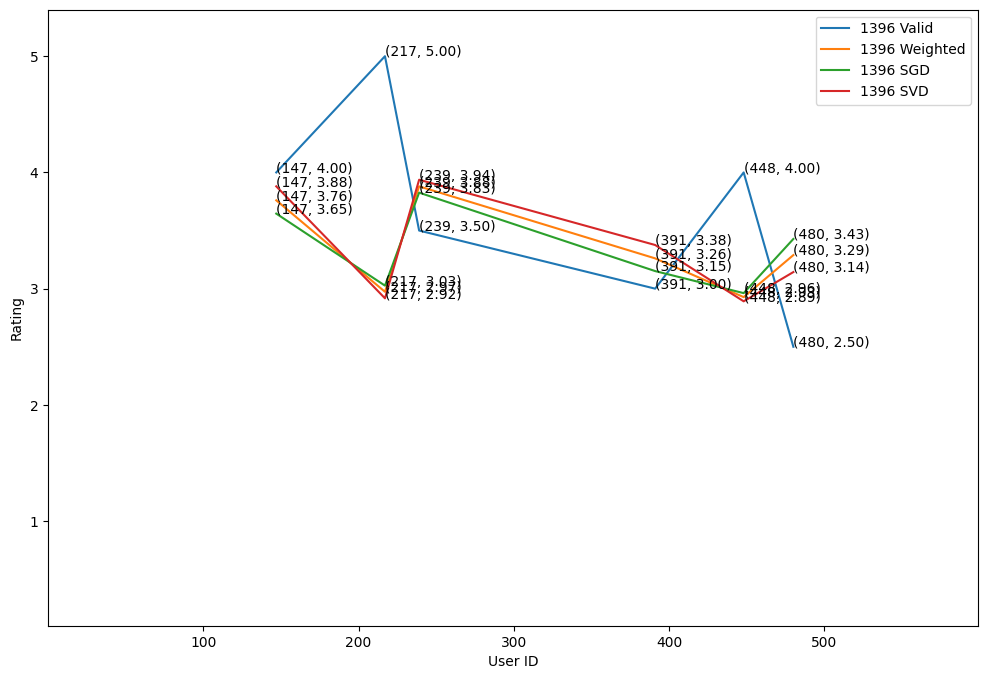

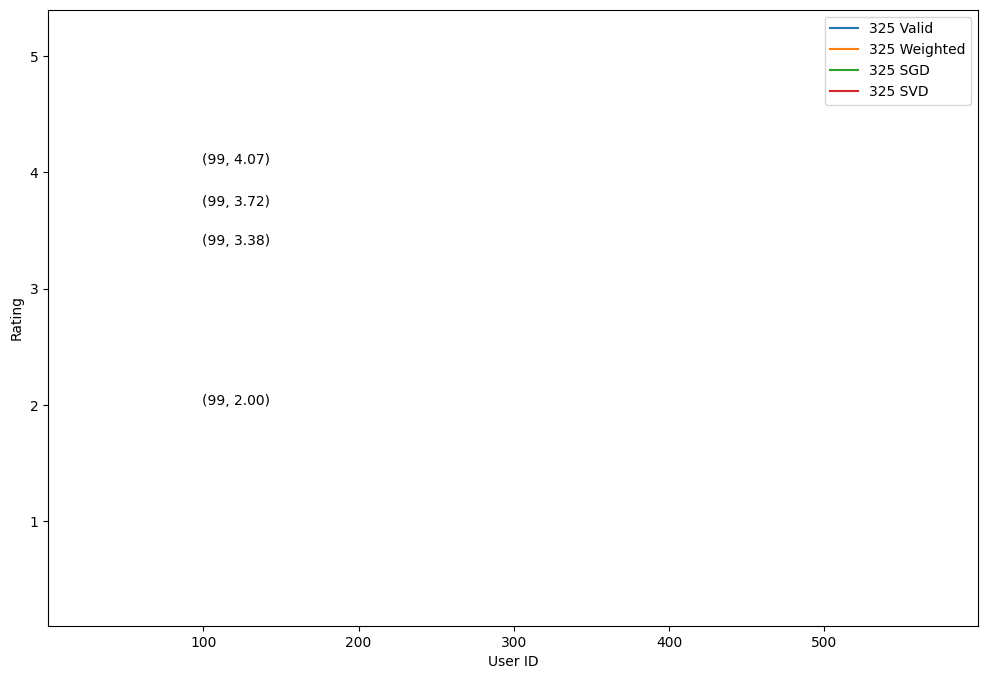

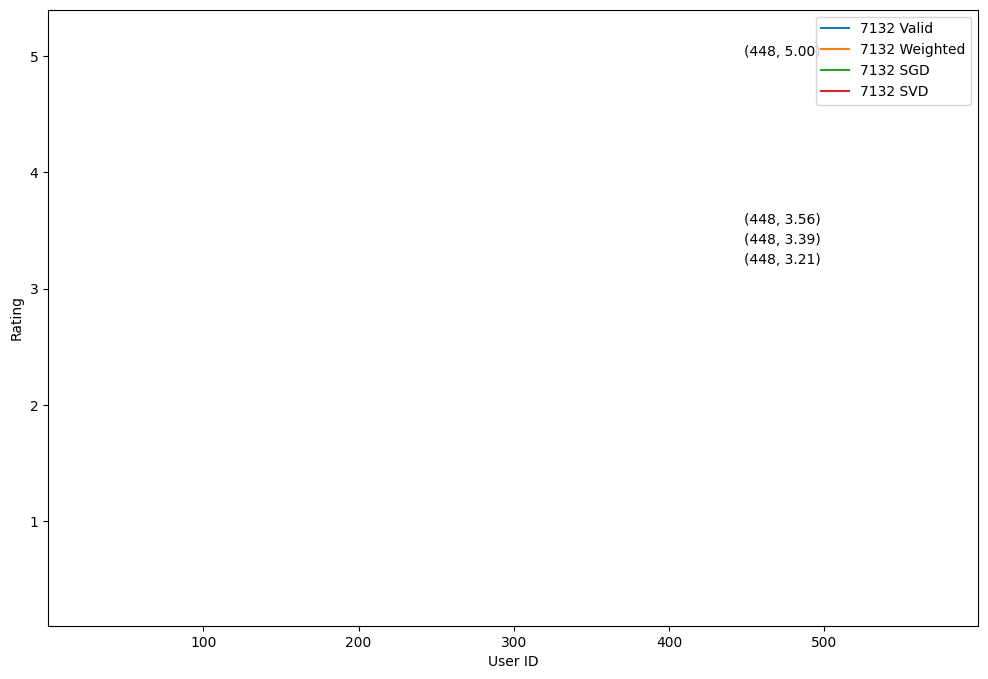

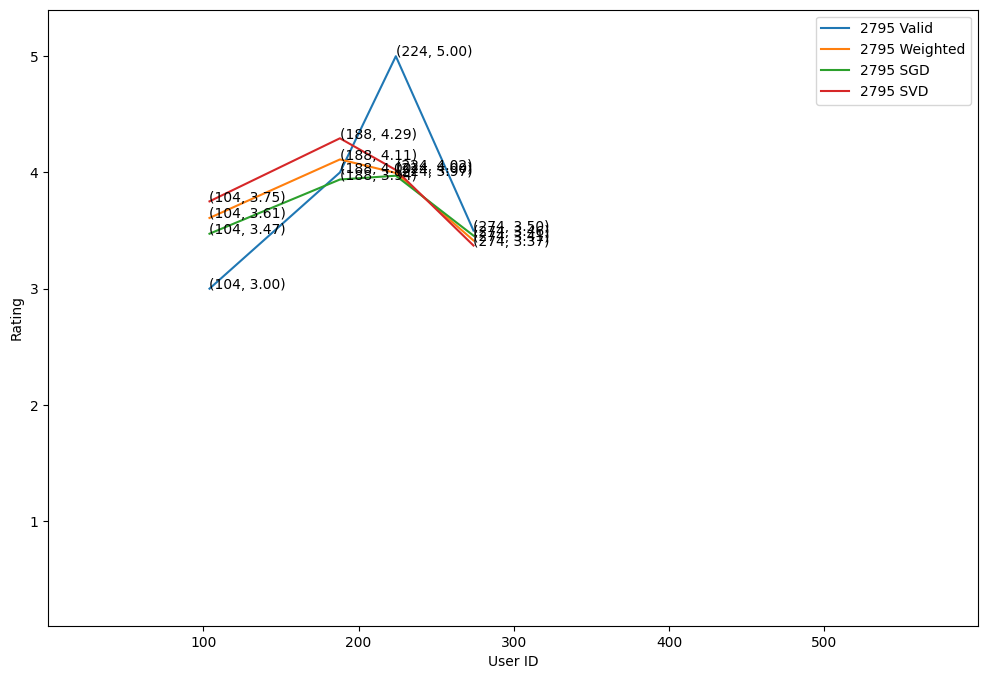

In [ ]:
# Visualization
# Randomly pick 20 samples

import matplotlib.pyplot as plt
import random

for i in range(20):
    all_movie_ids = list(ratings_predWeightedXT['movieId'].unique())
    movie_ids = random.sample(all_movie_ids, 1)

    fig, ax = plt.subplots(figsize=(12, 8))

    for movie_id in movie_ids:
        x = ratings_predWeightedXT[ratings_predWeightedXT['movieId']==movie_id]['userId']
        y_weighted = ratings_predWeightedXT[ratings_predWeightedXT['movieId']==movie_id]['Weighted Predicted Rating']
        y_SGD = ratings_predWeightedXT[ratings_predWeightedXT['movieId']==movie_id]['Predicted SGD Rating']
        y_SVD = ratings_predWeightedXT[ratings_predWeightedXT['movieId']==movie_id]['Predicted SVD Rating']
        y_valid = ratings_predWeightedXT[ratings_predWeightedXT['movieId']==movie_id]['Rating Valid']


        # do from here
        ax.plot(x, y_valid, label=f'{movie_id} Valid')
        ax.plot(x, y_weighted, label=f'{movie_id} Weighted')
        ax.plot(x, y_SGD, label=f'{movie_id} SGD')
        ax.plot(x, y_SVD, label=f'{movie_id} SVD')

        for x_coord, y_coord in zip(x, y_weighted):
            ax.annotate(f'({x_coord}, {y_coord:.2f})', (x_coord, y_coord))

        for x_coord, y_coord in zip(x, y_valid):
            ax.annotate(f'({x_coord}, {y_coord:.2f})', (x_coord, y_coord))

        for x_coord, y_coord in zip(x, y_SVD):
            ax.annotate(f'({x_coord}, {y_coord:.2f})', (x_coord, y_coord))

        for x_coord, y_coord in zip(x, y_SGD):
            ax.annotate(f'({x_coord}, {y_coord:.2f})', (x_coord, y_coord))

    ax.set_xlim([0.1, 599])
    ax.set_ylim([0.1, 5.4])
    ax.set_xlabel('User ID')
    ax.set_ylabel('Rating')
    plt.legend(loc='upper right')
    ax.legend()
    plt.show()

# Unused

In [ ]:
ratings_predWeightedF = ratings_predWeightedN # Clone all rating tables

# calculate weighted ratings
ratings_predWeightedF['Weighted Predicted Rating'] = (ratings_predWeightedF['Predicted SGD Rating']*0.495) + (ratings_predWeightedF['Predicted SVD Rating']*0.505)


# Final all rating tables (incl. weighted ratings)
ratings_predWeightedF

In [ ]:
# UNUSED
# calculate RMSE with weighted rating and validation rating

r_trueW = ratings_predWeightedF['Weighted Predicted Rating'].to_numpy()
r_predW = ratings_predWeightedF['Rating Valid'].to_numpy()

rmseFN = mean_squared_error(r_trueW, r_predW, squared=False)

print(f"Validation Weighted Model RMSE = {rmseFN:.4f}")

In [ ]:
import matplotlib.pyplot as plt
import random

# Initialize a counter to keep track of how many plots have been created
plot_count = 0

# Loop through 5 random movies
for i in range(5):
    # all_movie_ids = list(ratings_predWeightedF['movieId'].unique())
    # movie_ids = random.sample(all_movie_ids, 1)
    movie_ids = chosen_l

    # Create a new figure and axes object every three iterations
    if plot_count % 3 == 0:
        fig, axes = plt.subplots(nrows=1, ncols=3, figsize=(16, 4))
        plot_index = 0

    # Plot the movie ratings on the current set of axes
    for movie_id in movie_ids:
        ax = axes[plot_index]
        ax.plot(ratings_predWeightedF[ratings_predWeightedF['movieId']==movie_id]['userId'],
                ratings_predWeightedF[ratings_predWeightedF['movieId']==movie_id]['Weighted_Rating'],
                label=f'{movie_id} Weighted')
        ax.plot(ratings_predWeightedF[ratings_predWeightedF['movieId']==movie_id]['userId'],
                ratings_predWeightedF[ratings_predWeightedF['movieId']==movie_id]['Rating Valid'],
                label=f'{movie_id} Valid')

        ax.set_xlim([0, 561])
        ax.set_ylim([0, 5])
        ax.set_xlabel('User ID')
        ax.set_ylabel('Rating')
        ax.legend()

        # Increment the plot index
        plot_index += 1

    # If we've created three plots, show the figure and reset the counter
    if plot_count % 3 == 2 or i == 4:
        plt.tight_layout()
        plt.show()

    plot_count += 1

In [ ]:
import matplotlib.pyplot as plt
import random

# Set number of columns and rows for subplots
n_cols = 3
n_rows = 2

fig, axes = plt.subplots(nrows=n_rows, ncols=n_cols, figsize=(18, 10))

# Flatten axes so that they can be iterated over in a 1D array
axes = axes.flatten()

for i in range(n_cols * n_rows):
    all_movie_ids = list(ratings_predWeightedF['movieId'].unique())
    movie_ids = random.sample(all_movie_ids, 1)

    ax = axes[i]

    for movie_id in movie_ids:
        x = ratings_predWeightedF[ratings_predWeightedF['movieId']==movie_id]['userId']
        y_weighted = ratings_predWeightedF[ratings_predWeightedF['movieId']==movie_id]['Weighted_Rating']
        y_valid = ratings_predWeightedF[ratings_predWeightedF['movieId']==movie_id]['Rating Valid']

        ax.plot(x, y_weighted, label=f'{movie_id} Weighted')
        ax.plot(x, y_valid, label=f'{movie_id} Valid')

        for x_coord, y_coord in zip(x, y_weighted):
            ax.annotate(f'({x_coord}, {y_coord:.2f})', (x_coord, y_coord))

        for x_coord, y_coord in zip(x, y_valid):
            ax.annotate(f'({x_coord}, {y_coord:.2f})', (x_coord, y_coord))

    ax.set_xlim([0.1, 599])
    ax.set_ylim([1, 6])
    ax.set_xlabel('User ID')
    ax.set_ylabel('Rating')
    ax.legend()

# Hide empty subplots
for j in range(i+1, n_cols*n_rows):
    axes[j].axis('off')

# Adjust spacing between subplots
plt.subplots_adjust(wspace=0.3, hspace=0.3)

plt.show()

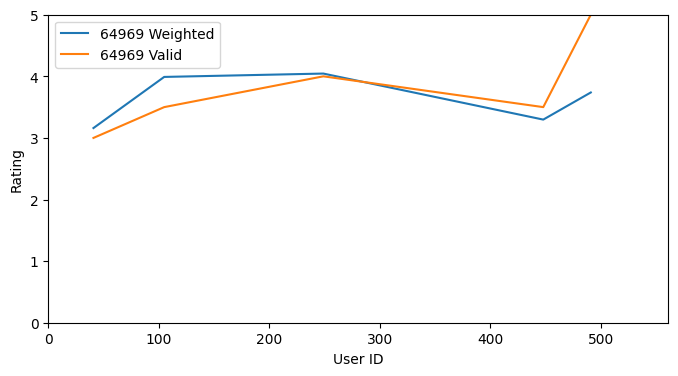

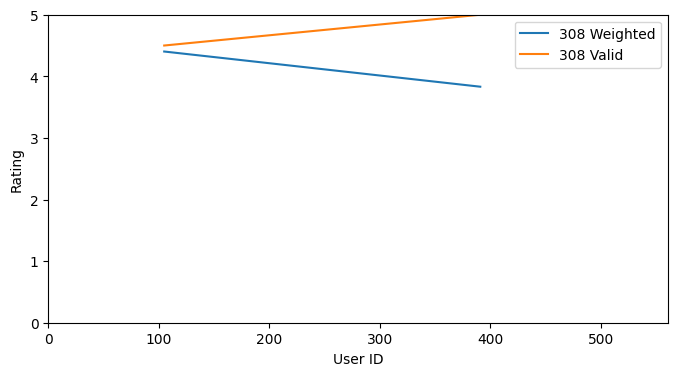

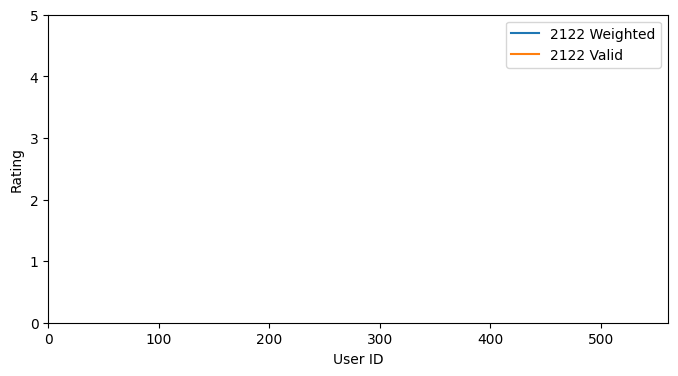

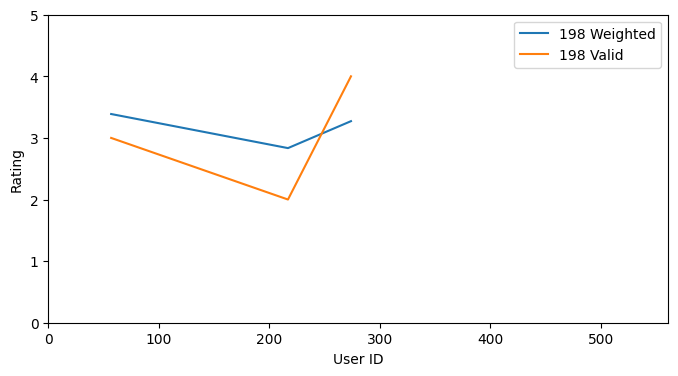

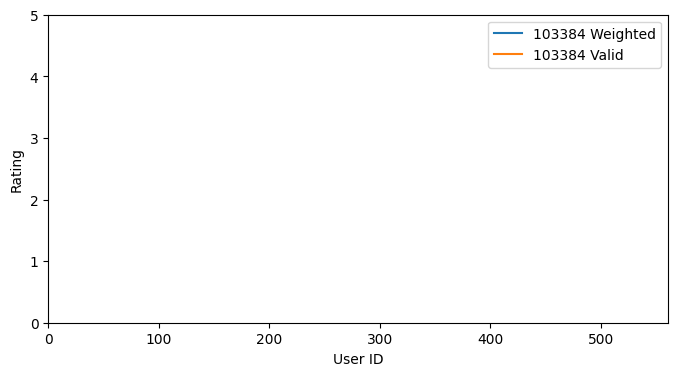

In [ ]:
import matplotlib.pyplot as plt
import random

for i in range(5):
    all_movie_ids = list(ratings_predWeightedF['movieId'].unique())
    movie_ids = random.sample(all_movie_ids, 1)

    fig, ax = plt.subplots(figsize=(8, 4))

    for movie_id in movie_ids:
        ax.plot(ratings_predWeightedF[ratings_predWeightedF['movieId']==movie_id]['userId'],
                ratings_predWeightedF[ratings_predWeightedF['movieId']==movie_id]['Weighted_Rating'],
                label=f'{movie_id} Weighted')
        ax.plot(ratings_predWeightedF[ratings_predWeightedF['movieId']==movie_id]['userId'],
                ratings_predWeightedF[ratings_predWeightedF['movieId']==movie_id]['Rating Valid'],
                label=f'{movie_id} Valid')

    ax.set_xlim([0, 561])
    ax.set_ylim([0, 5])
    ax.set_xlabel('User ID')
    ax.set_ylabel('Rating')
    plt.legend(loc='upper right')
    ax.legend()
    plt.show()

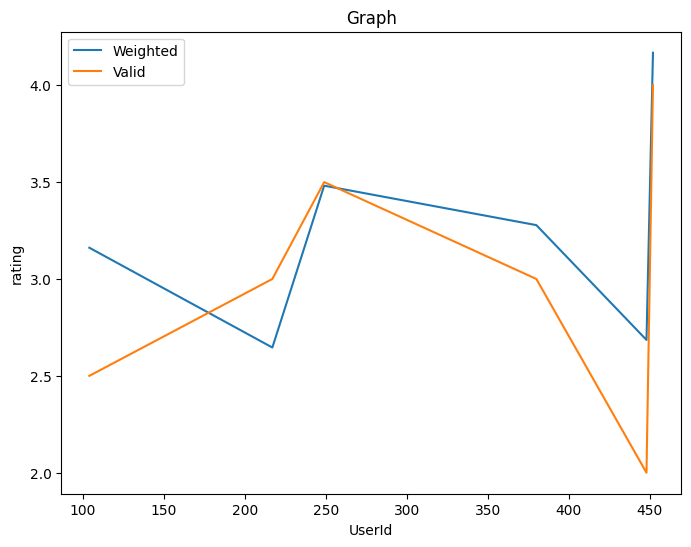

In [ ]:
import matplotlib.pyplot as plt
import pandas as pd

# plot line graphs
fig, ax = plt.subplots(figsize=(8, 6))
ax.plot(ratings_predWeightedF[ratings_predWeightedF['movieId']==1833]['userId'], ratings_predWeightedF[ratings_predWeightedF['movieId']==1833]['Weighted_Rating'], label='Weighted')
ax.plot(ratings_predWeightedF[ratings_predWeightedF['movieId']==1833]['userId'], ratings_predWeightedF[ratings_predWeightedF['movieId']==1833]['Rating Valid'], label='Valid')

#ax.plot(ratings_predWeightedF[ratings_predWeightedF['movieId']==1953]['userId'], ratings_predWeightedF[ratings_predWeightedF['movieId']==1953]['Weighted_Rating'], label='Weighted')
#ax.plot(ratings_predWeightedF[ratings_predWeightedF['movieId']==1953]['userId'], ratings_predWeightedF[ratings_predWeightedF['movieId']==1953]['Rating Valid'], label='Valid')
# 7570


# add legend, labels and title
ax.legend()
ax.set_xlabel('UserId')
ax.set_ylabel('rating')
ax.set_title('Graph')

# show plot
plt.show()

In [ ]:
# UNUSED
# CRASH SESSION
# round value in the weighted training to the closest .5
import sys
sys.setrecursionlimit(10**6)

ratings_predWeightedFN = ratings_predWeightedF
ratings_predWeightedFN = ratings_predWeightedFN['Rounded Weighted Rating'] = ratings_predWeightedF['Weighted_Rating'].apply(lambda x: round(x * 2) / 2)
ratings_predWeightedFN